
1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from scipy.stats import norm, linregress
import scipy.integrate as integrate
import pandas as pd
import seaborn as sns

In [2]:
N = input("Insert number of elements N: ")     #tested value N = 500
N = int(N)
mu = input("Insert the mean of the normal distribution: ")     #tested value mu = 5
mu = float(mu)
sigma = input("Insert the standard deviation of the normal distribution: ")     #tested value sigma = 2
sigma = float(sigma)

Insert number of elements N: 500
Insert the mean of the normal distribution: 5
Insert the standard deviation of the normal distribution: 2


In [3]:
x = np.random.normal(loc=mu, scale=sigma, size=N)

The norm of the histogram is:  99.6
The norm of the sum of all the Gaussian functions is:  499.9999999999252
The norm of the final function, interpolating the points of the histogram is:  99.6


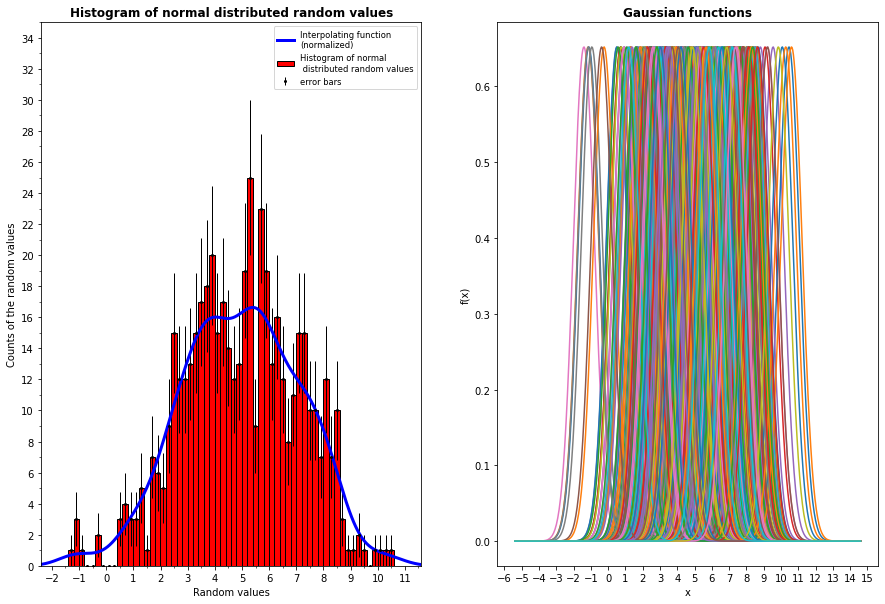

In [4]:
fig, (ax,ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15,10))

#Here I create the histogram
mx = x.min()
Mx = x.max()
spc = 100/N
a = ax.hist(x, bins=np.arange(mx, Mx, spc), label='Histogram of normal \n distributed random values', color='red',edgecolor="black")

My = a[0].max()

ax.set_xlim(mx-1, Mx+1)
ax.set_ylim(0, My+10)
ax.set_title('Histogram of normal distributed random values', fontweight="bold")
ax.set_xlabel('Random values')
ax.set_ylabel('Counts of the random values')

ax.xaxis.set_major_locator(MultipleLocator(1)) #every tick on x axes is an integer
ax.xaxis.set_minor_locator(AutoMinorLocator(2)) #it defines how many minor ticks there are between two major ticks
ax.yaxis.set_major_locator(MultipleLocator(2)) #every tick on y axes is an integer
ax.yaxis.set_minor_locator(AutoMinorLocator(2)) #it defines how many minor ticks there are between two major ticks







#Here I add the error bars
poisson_uncertainty = a[0]**(1/2)
poisson_uncertainty = np.where(poisson_uncertainty == np.Inf, 0, poisson_uncertainty)
bin_centers = 0.5*(a[1][1:] + a[1][:-1])

ax.errorbar(bin_centers, a[0], xerr=None, yerr=poisson_uncertainty, linestyle='None', fmt='.-k', markersize=4, linewidth=1, markeredgecolor='black', label='error bars')









#Here I create the gaussians:
var = 1.06*sigma*(N**(-1/5))
x_m = mx-(2*sigma)
x_M = Mx+(2*sigma)
X = np.linspace(x_m, x_M, N) 
gaussians = np.zeros(len(X))

for val in x:
    Y = norm.pdf(X, loc=val, scale=var)
    gaussians += Y
    ax1.plot(X, Y)

ax1.set_title('Gaussian functions', fontweight="bold")
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.xaxis.set_major_locator(MultipleLocator(1))
#ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
ax1.yaxis.set_major_locator(MultipleLocator(0.1))




nrm_x = integrate.trapz(a[0], x=bin_centers) #integral of the histogram
nrm_Y = integrate.trapz(gaussians, x=X) #integral of sum of gaussians

gaussians = (gaussians)*(nrm_x/nrm_Y) #normalization of gaussians

nrm_fin = integrate.trapz(gaussians, x=X)

print("The norm of the histogram is: ", nrm_x)
print("The norm of the sum of all the Gaussian functions is: ", nrm_Y)
print("The norm of the final function, interpolating the points of the histogram is: ", nrm_fin)

ax.plot(X, gaussians, color='blue', linewidth=3, label='Interpolating function\n(normalized)')
ax.legend(loc='best', fontsize='small')

2\.**Color-coded scatter plot** 

Produce a scatter plot out of a dataset with two categories

 * Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given   mean and std (clearly it is better to have different values means..)

 * Display the dataset in a scatter plot marking the two categories with different marker colors.
 
You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

In [5]:
def Gaussian2D(mean, cov_mat, N):
    X = np.random.multivariate_normal(mean, cov_mat, N)
    return pd.DataFrame(X, columns = ["x", "y"])

In [6]:
cov_mat_1 = [[2,0],[0,3]]
cov_mat_2 = [[1,0],[0,2]]
mean_1 = [-1,-3]
mean_2 = [1,-2]
N_1 = 1000
N_2 = 1000

df_1 = Gaussian2D(mean_1,cov_mat_1,N_1)
df_2 = Gaussian2D(mean_2,cov_mat_2,N_2)

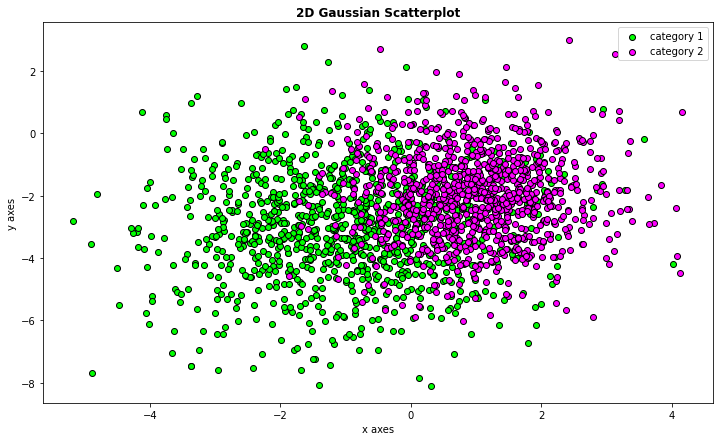

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))
ax.scatter(df_1["x"],df_1["y"], label = "category 1", edgecolor="black",color = "lime")
ax.scatter(df_2["x"],df_2["y"], label = "category 2", edgecolor="black",color = "fuchsia")
ax.set_title('2D Gaussian Scatterplot', fontweight="bold")
ax.set_xlabel("x axes")
ax.set_ylabel("y axes")
ax.legend(loc = "best")
plt.show()

In [8]:
# let's try to make the procedure more general by allowing a given number  𝑛≥2  of categories

In [9]:
# in this code I have implented a while cicle as long as the random covariance matrix isn't  positive defined, but this randomic strategy takes too much time
# for this reason, in the code below I have defined the covariance matrix

"""def cat_gen(ncat, dim):
    ncat = int(ncat) #number of categories
    dim = int(dim)  #number of samples for each category
    df = pd.DataFrame()
    for i in range(0, ncat):
        ind = str(i)
        mean = 10*np.random.random((2,)) #bidimensional arrey for the mean 
        k = 0
        while k == 0:
            c = 10*np.random.random((2,))
            cov = np.array([c, np.flip(c)])  #covariance matrix
            Tr = np.trace(cov) #trace of covariance matrix
            Det = np.linalg.det(cov) #determinant of covariant matrix
            Delta = (Tr**2) - (4*Det)
            S1 = (Tr + np.sqrt(Delta))/2  #solution one of 
            S2 = (Tr - np.sqrt(Delta))/2
            if Delta >= 0 and S1 >= 0 and S2 >= 0: #la matrice di covarianza è definita positiva
                data = np.random.multivariate_normal(mean, cov, dim) #generate the "gaussian distributed data"
                k += 1
            else:
                k += 0
        name1 = 'x_'+ind #give the name for x of each category
        name2 = 'y_'+ind #give the name for x of each category
        temp_df = pd.DataFrame(data, columns=[name1, name2])
        df = df.append(temp_df)
    return df

cat = input("Insert number of categories: ")
cat = int(cat)
N = input("Insert number of points: ")
N = int(N)

cat_gen(cat, N)

fig1, ax1 = plt.subplots(figsize=(10, 10))
for j in range(0, cat):
    num = str(j)
    #col1 = 'x_'+num
    #col2 = 'y_'+num
    sentence = 'category number '+num
    scatter = ax1.scatter(x=cat_gen(cat, N)[col1], y=cat_gen(cat, N)[col2], label=sentence)

ax1.legend(loc='best', fontsize='medium')
n = str(cat)
ax1.set_title('2D Color-coded scatter plot of '+n+' categories', fontweight="bold")
ax1.set_xlabel('x axis')
ax1.set_ylabel('y axis')
#ax1.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)"""

'def cat_gen(ncat, dim):\n    ncat = int(ncat) #number of categories\n    dim = int(dim)  #number of samples for each category\n    df = pd.DataFrame()\n    for i in range(0, ncat):\n        ind = str(i)\n        mean = 10*np.random.random((2,)) #bidimensional arrey for the mean \n        k = 0\n        while k == 0:\n            c = 10*np.random.random((2,))\n            cov = np.array([c, np.flip(c)])  #covariance matrix\n            Tr = np.trace(cov) #trace of covariance matrix\n            Det = np.linalg.det(cov) #determinant of covariant matrix\n            Delta = (Tr**2) - (4*Det)\n            S1 = (Tr + np.sqrt(Delta))/2  #solution one of \n            S2 = (Tr - np.sqrt(Delta))/2\n            if Delta >= 0 and S1 >= 0 and S2 >= 0: #la matrice di covarianza è definita positiva\n                data = np.random.multivariate_normal(mean, cov, dim) #generate the "gaussian distributed data"\n                k += 1\n            else:\n                k += 0\n        name1 = \'x_\'

Insert number of categories: 3
Insert number of points: 100


Text(0, 0.5, 'y axis')

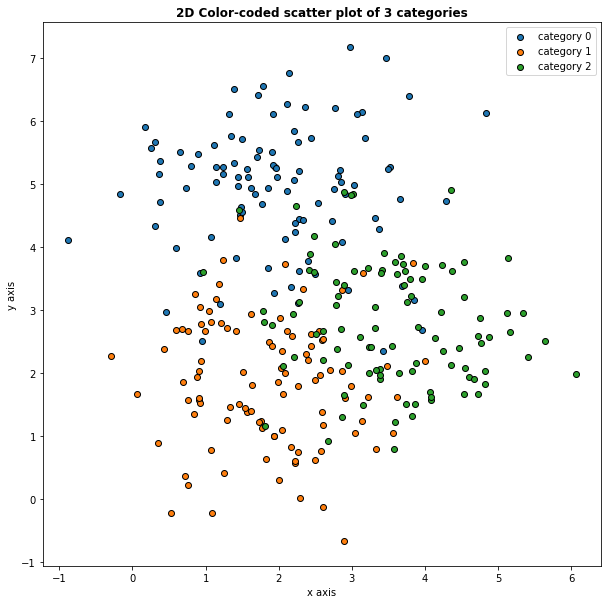

In [10]:
def cat_gen(ncat, dim):
    ncat = int(ncat) #number of categories
    dim = int(dim)  #number of samples for each category
    df = pd.DataFrame()
    for i in range(0, ncat):
        ind = str(i)
        mean = 10*np.random.random((2,)) #arrey for the mean 
        #c = 10*np.random.random((2,))
        cov = np.ones((2, 2))  #covariance matrix full of 1
        data = np.random.multivariate_normal(mean, cov, dim)
        name1 = 'x_'+ind #give the name for x of each category
        name2 = 'y_'+ind #give the name for x of each category
        temp_df = pd.DataFrame(data, columns=[name1, name2])
        df = df.append(temp_df)
    return df

cat = input("Insert number of categories: ")
cat = int(cat)
N = input("Insert number of points: ")
N = int(N)

cat_gen(cat, N)

fig1, ax1 = plt.subplots(figsize=(10, 10))
for j in range(0, cat):
    num = str(j)
    col1 = 'x_'+num
    col2 = 'y_'+num
    sentence = 'category '+num
    scatter = ax1.scatter(x=cat_gen(cat, N)[col1], y=cat_gen(cat, N)[col2], label=sentence, edgecolor = "black")

ax1.legend(loc='best', fontsize='medium')
n = str(cat)
ax1.set_title('2D Color-coded scatter plot of '+n+' categories', fontweight="bold")
ax1.set_xlabel('x axis')
ax1.set_ylabel('y axis')
#ax1.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [11]:
data = np.load("residuals_261.npy",allow_pickle=True)
df = pd.DataFrame(data.item())

In [12]:
df.columns

Index(['residuals', 'distances'], dtype='object')

In [13]:
#Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
df = df[abs(df['residuals'])<2]

In [14]:
#perform a linear regression of "residuals" versus "distances" using scipy.stats.linregress()
m, q, rvalue, pvalue, stderr = linregress(df['distances'], df['residuals'])
print("\nParameters of the linear fit of the data:")
print("Slope: ", m)
print("Intercept: ", q)
print("Correlation coefficient: ", rvalue)
print("P-value: ", pvalue)
print("Standard error: ", stderr)


Parameters of the linear fit of the data:
Slope:  0.0032597701220305835
Intercept:  -0.15432816763069473
Correlation coefficient:  0.043403510522559086
P-value:  8.717037183576464e-06
Standard error:  0.0007327014008445789


In [15]:
bin_info1 = np.histogram(df['distances'], range=(0,20), bins=20)
bin_edges = bin_info1[1]
x = 0.5*(bin_edges[1:] + bin_edges[:-1]) #array of bin centers

y = np.array([])
erry = np.array([])
for l in range(0, len(bin_edges)-1):
    low = bin_edges[l]
    high = bin_edges[l+1]
    temp = df[(df['distances']>=low) & (df['distances']<high)] #select the values of the df that are included in the bin 
    y = np.append(y, temp['residuals'].mean())
    erry = np.append(erry, temp['residuals'].std())

In [16]:
print("the mean values of the 'residuals', estimated in slices (bins) of 'distance' \n\n",y)

the mean values of the 'residuals', estimated in slices (bins) of 'distance' 

 [-0.24725253 -0.13466177 -0.17574601 -0.16524753 -0.12789461 -0.13872711
 -0.1044014  -0.07896219 -0.10254436 -0.0908137  -0.03936474 -0.09986082
 -0.08483813 -0.13585659 -0.13911416 -0.13586924 -0.1405092  -0.15795732
 -0.12680518 -0.05412943]


In [17]:
print("the standard deviation of the of the 'residuals', estimated in slices (bins) of 'distance' \n\n",erry)

the standard deviation of the of the 'residuals', estimated in slices (bins) of 'distance' 

 [0.48576155 0.42803951 0.4250441  0.40964586 0.39026555 0.39313766
 0.4459799  0.45432505 0.44370592 0.40508698 0.43882926 0.48141583
 0.50415864 0.45683832 0.45216187 0.46115892 0.43144405 0.42638868
 0.40944766 0.38053331]


C:\Users\Utente\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


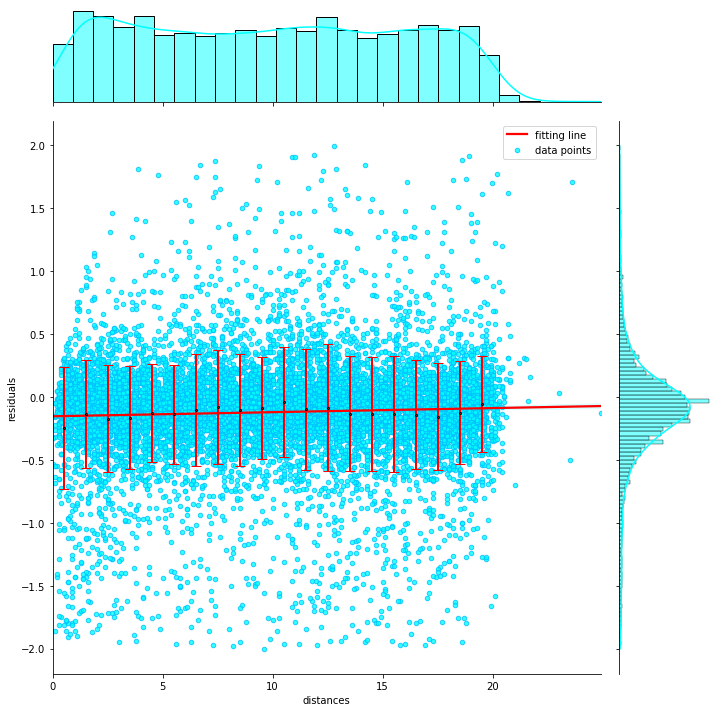

In [25]:
#plot a seaborn jointplot of "residuals" versus "distances", having seaborn performing a linear regression. The result of the #regression should be displayed on the plot
g = sns.jointplot("distances", "residuals", data=df, kind="reg", scatter_kws={'s': 20, "ec":"deepskyblue"}, height = 10, color = "cyan")
regline = g.ax_joint.get_lines()[0]
regline.set_color('red')

g.ax_joint.errorbar(x,y,erry, linestyle='None', fmt='.r', markersize=4, linewidth=2, markeredgecolor='black', capsize = 5)
g.ax_joint.legend(["fitting line","data points"])

<ErrorbarContainer object of 3 artists>

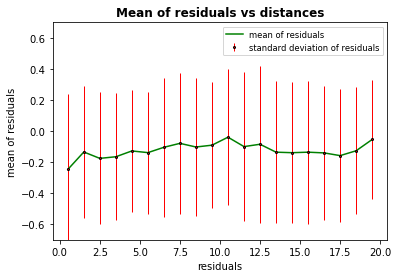

In [19]:
#This plot has been plotted in red on the top of the previous plot

fig, ax = plt.subplots()
ax.plot(x,y,color="green",label="mean of residuals")

ax.set_ylim(-0.7,0.7)
ax.errorbar(x,y,erry,linestyle='None', fmt='.-r', markersize=4, linewidth=1, markeredgecolor='black', label='standard deviation of residuals')
ax.legend(loc='best', fontsize='small')
ax.set_xlabel('residuals')
ax.set_ylabel('mean of residuals')
ax.set_title('Mean of residuals vs distances', fontweight="bold")

g.ax_joint.errorbar(x,y,erry,linestyle='None', fmt='.-r', markersize=4, linewidth=1, markeredgecolor='black')